In [1]:
!pip install mglearn
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.6 MB/s eta 0:00:00


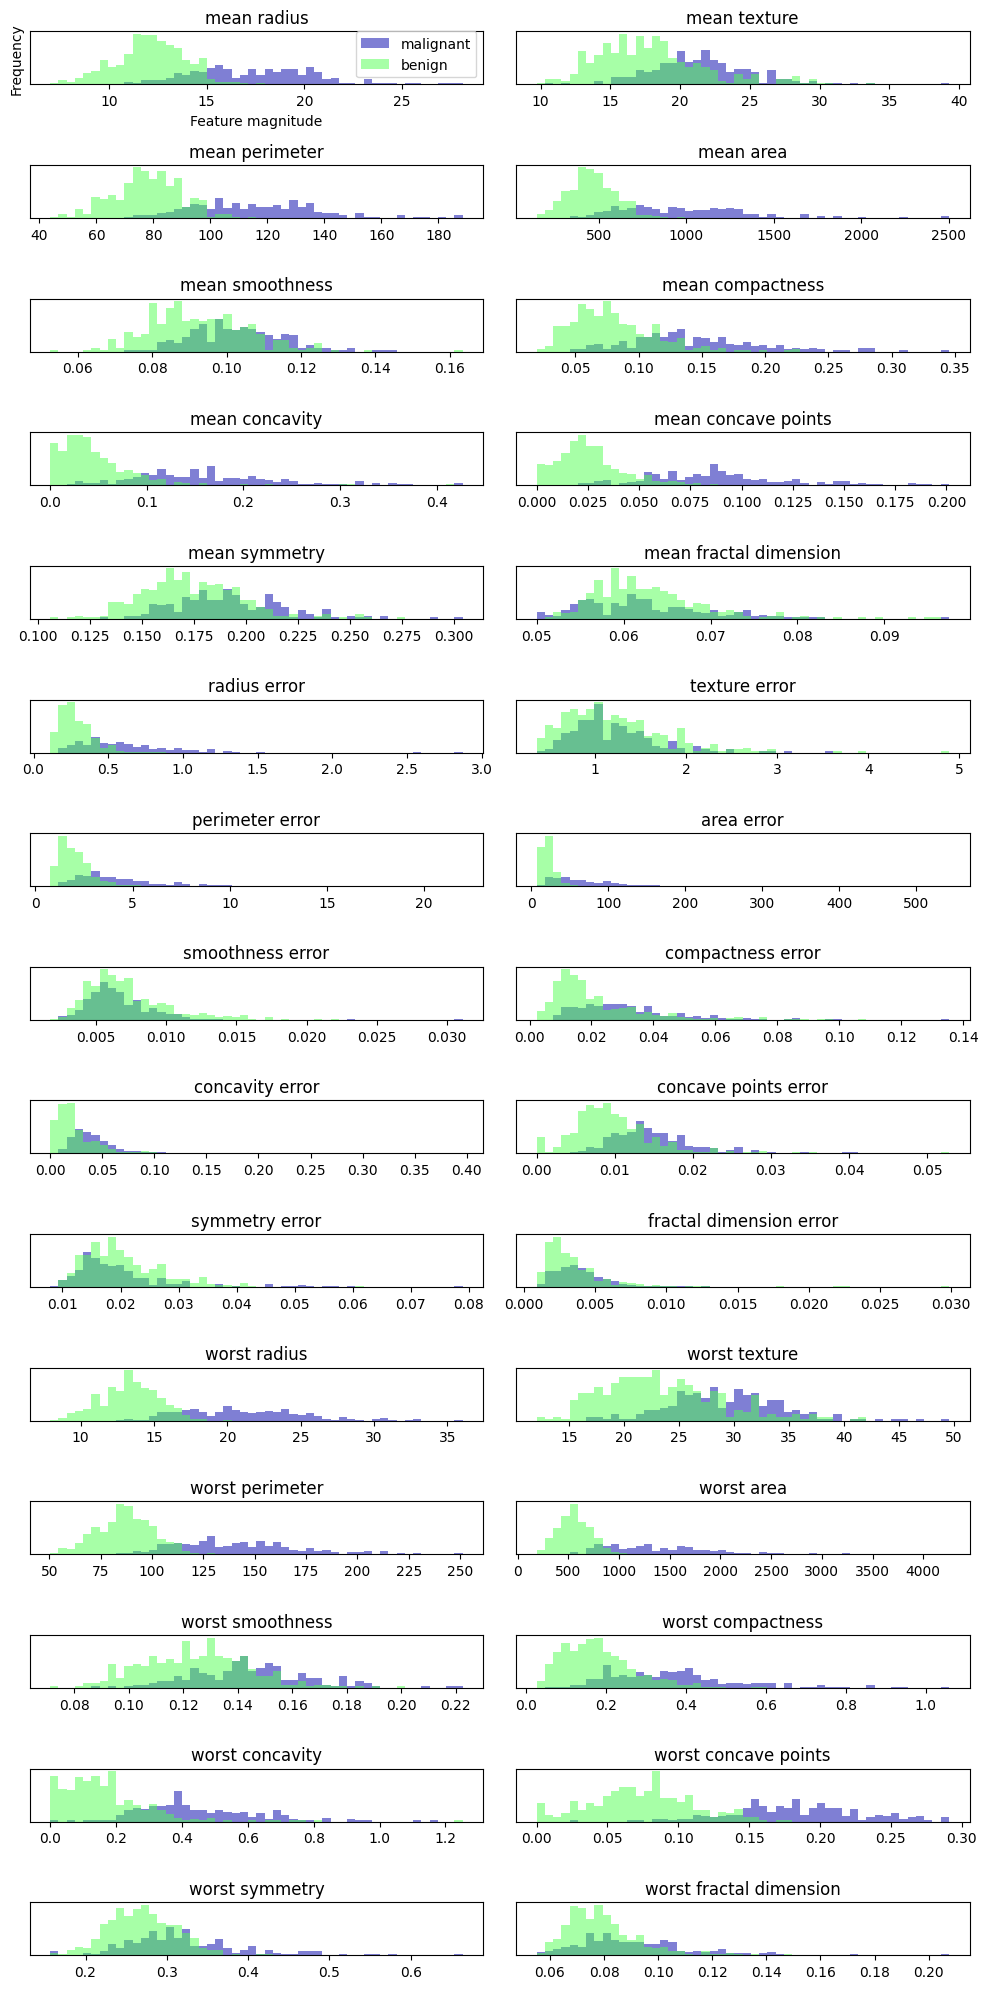

In [2]:
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler # Import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Original shape: (569, 30)
Reduced shape: (569, 2)
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


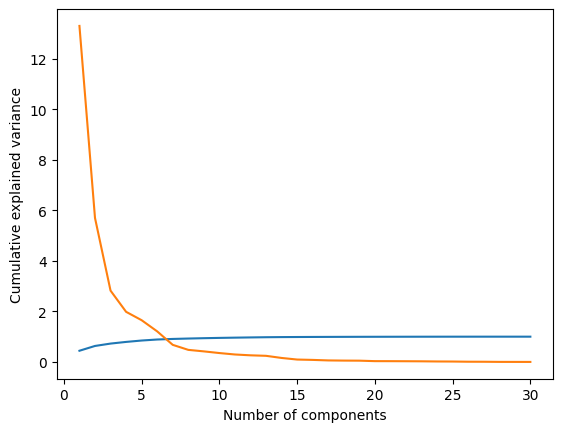

In [14]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

pca2 = PCA()
pca2.fit(X_scaled)
X_pca2 = pca2.transform(X_scaled)

print( pca2.explained_variance_ratio_ )
cumulative_variance = np.cumsum(pca2.explained_variance_ratio_)
print( cumulative_variance )

plt.plot(range(1,31), cumulative_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

plt.plot(range(1,31), pca2.explained_variance_)

Original shape: (569, 30)
Reduced shape: (569, 1)


Text(0.5, 0, 'First linear discriminator')

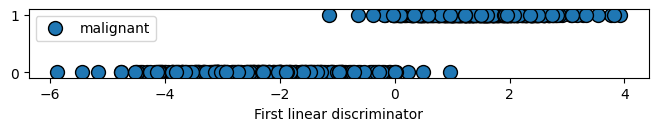

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, cancer.target)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_lda.shape)))

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_lda[:, 0], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First linear discriminator")

Text(0, 0.5, 'Second principal component')

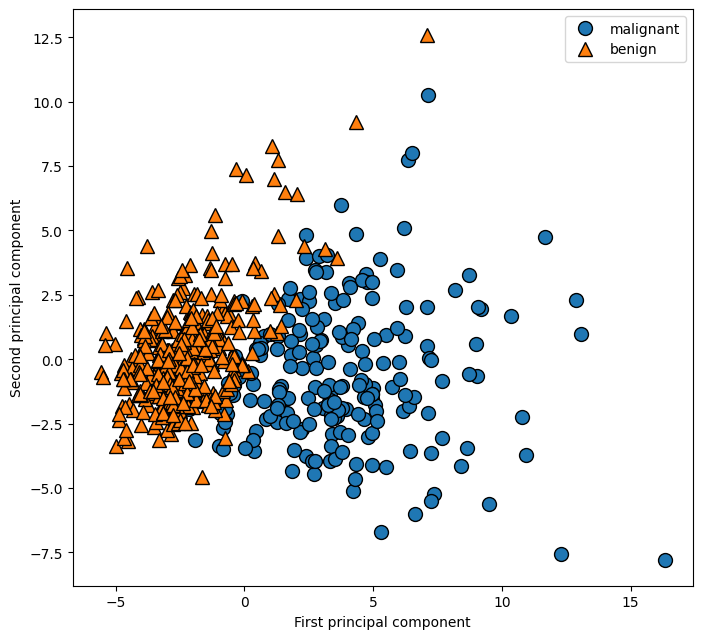

In [5]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

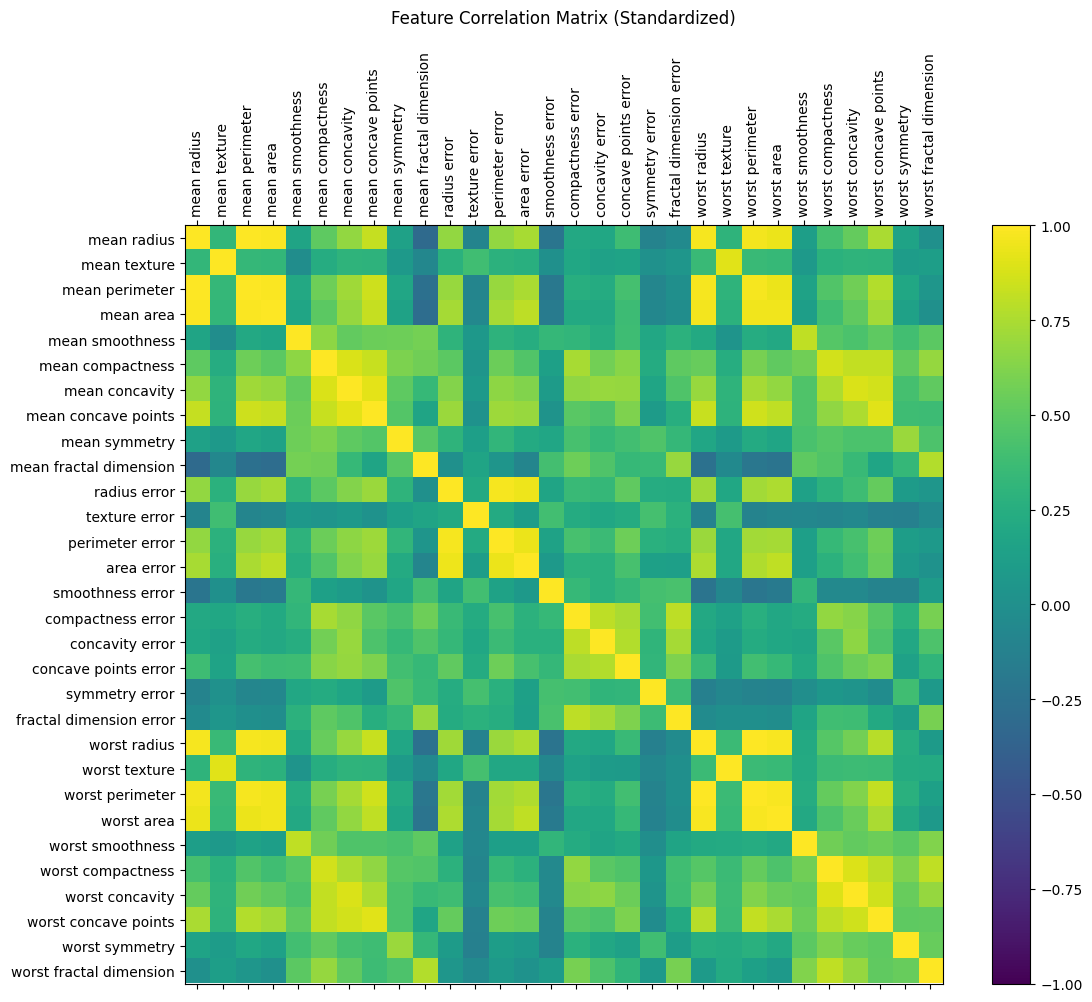

In [ ]:
# Load data
X = cancer.data
feature_names = cancer.feature_names

# Optional: standardize features before correlation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute correlation matrix
correlation_matrix = np.corrcoef(X_scaled, rowvar=False)

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticks(np.arange(len(feature_names)))
ax.set_yticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticklabels(feature_names)
plt.title("Feature Correlation Matrix (Standardized)", pad=20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Principal components')

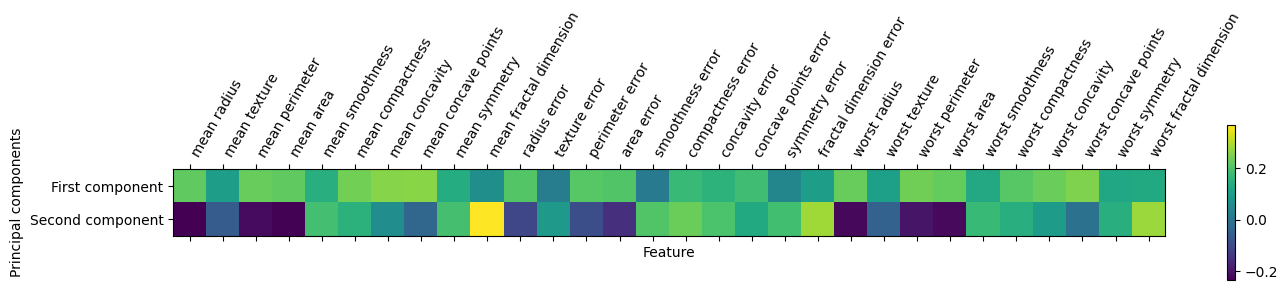

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Loading MNIST dataset...
(3000, 784)
Applying PCA...
Applying LDA...
Applying t-SNE...


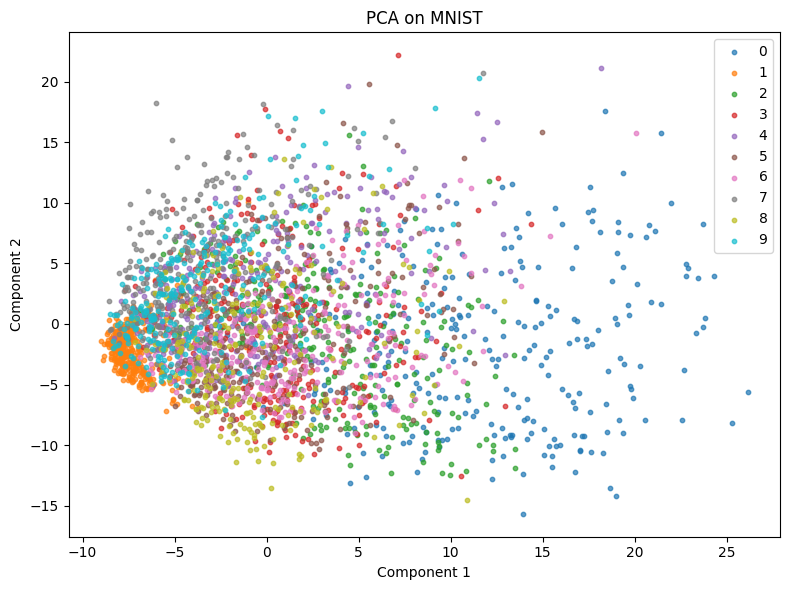

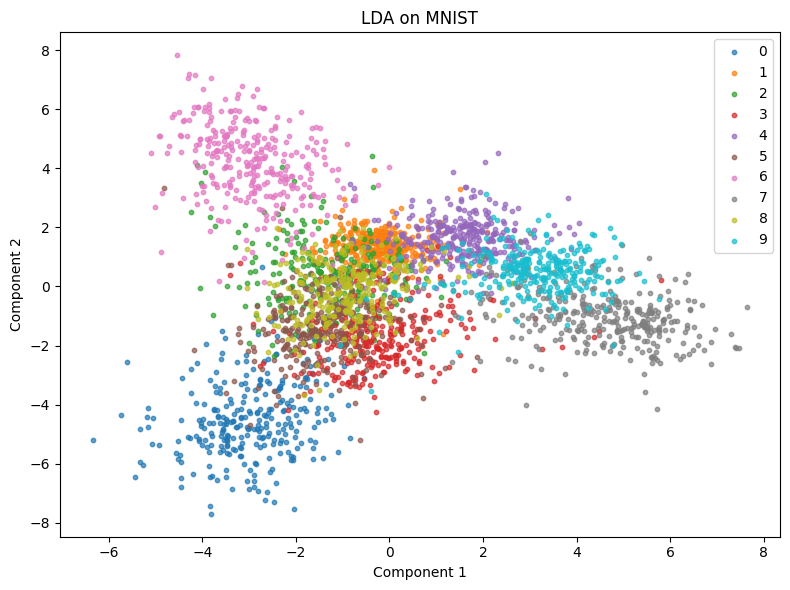

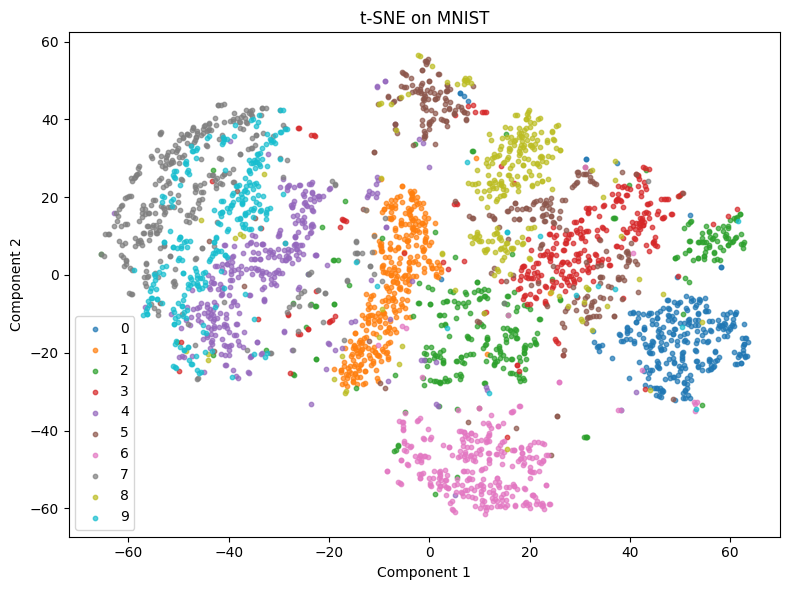

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load MNIST (use a smaller subset for speed)
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Select a subset (e.g. 3000 samples)
n_samples = 3000
X, y = X[:n_samples], y[:n_samples]

print(X.shape)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
print("Applying PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# LDA
print("Applying LDA...")
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotting function
def plot_embedding(X_embedded, y, title):
    plt.figure(figsize=(8, 6))
    for digit in np.unique(y):
        idx = y == digit
        plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=str(digit), s=10, alpha=0.7)
    plt.legend()
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.tight_layout()

# Plot all
plot_embedding(X_pca, y, "PCA on MNIST")
plot_embedding(X_lda, y, "LDA on MNIST")
plot_embedding(X_tsne, y, "t-SNE on MNIST")

plt.show()

Applying NMF (3 components)...


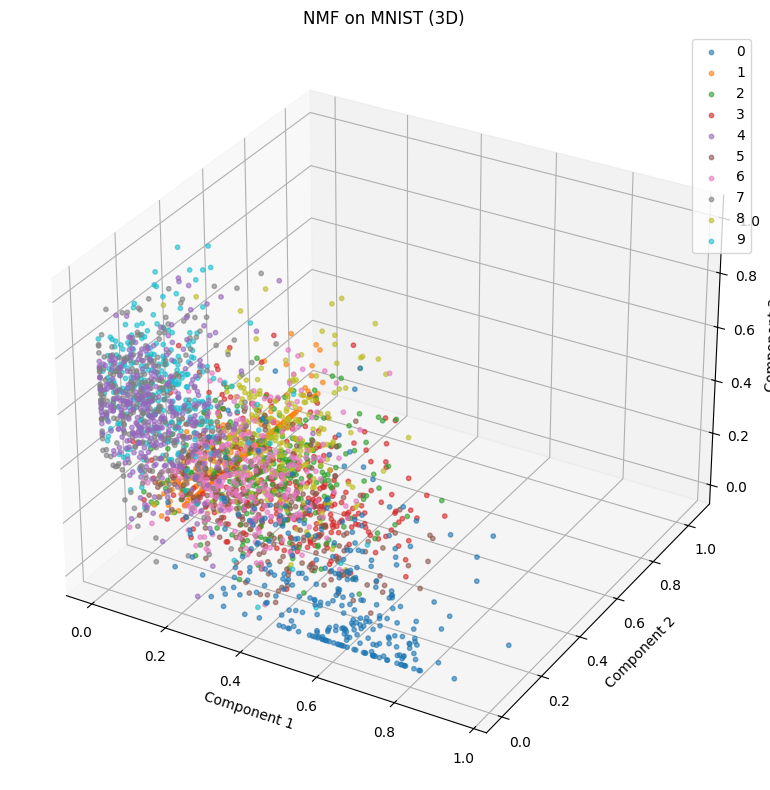

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # 3D projection
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Subset
n_samples = 3000
X, y = X[:n_samples], y[:n_samples]

# Normalize to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply NMF with 3 components
print("Applying NMF (3 components)...")
nmf = NMF(n_components=3, init='random', random_state=0, max_iter=300)
X_nmf = nmf.fit_transform(X_scaled)

# 3D Plotting
def plot_embedding_3d(X_embedded, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for digit in np.unique(y):
        idx = y == digit
        ax.scatter(
            X_embedded[idx, 0], X_embedded[idx, 1], X_embedded[idx, 2],
            label=str(digit), s=10, alpha=0.6
        )
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    ax.legend()
    plt.tight_layout()

# Show 3D plot
plot_embedding_3d(X_nmf, y, "NMF on MNIST (3D)")
plt.show()

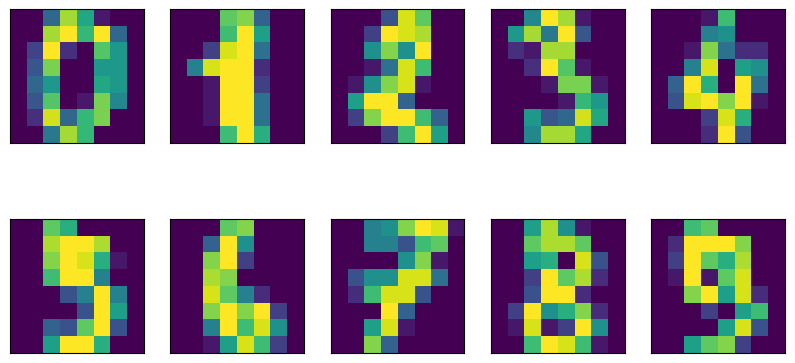

In [ ]:
# PCA and t-SNE for digits data
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
  ax.imshow(img)

Text(0, 0.5, 'Second principal component')

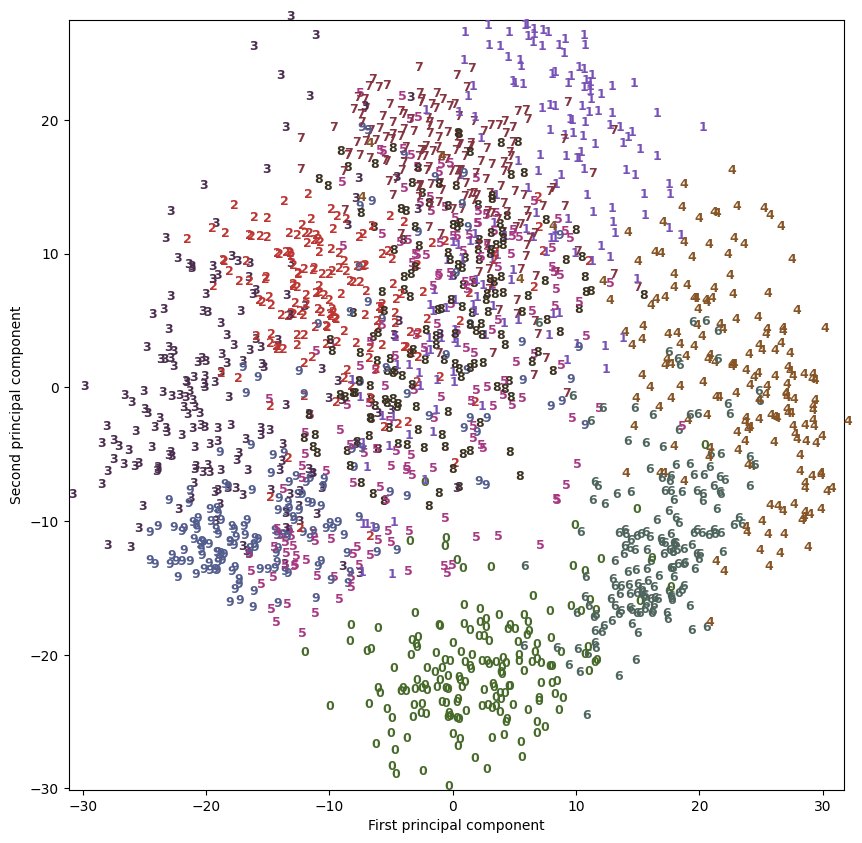

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
  # actually plot the digits as text instead of using scatter
  plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
  color = colors[digits.target[i]],

fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

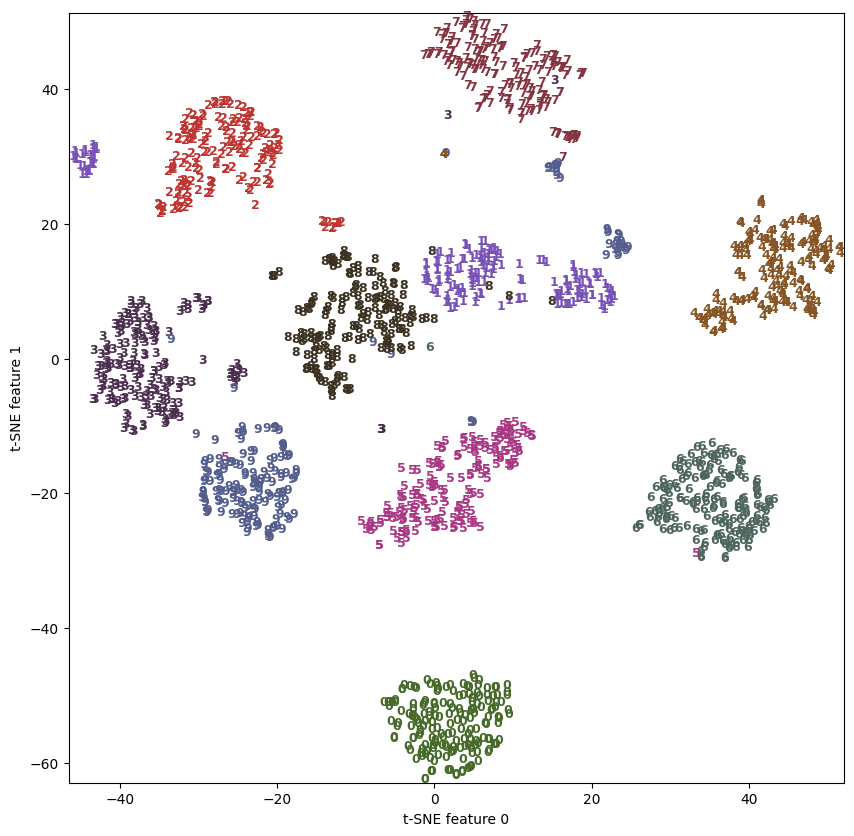

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
  # actually plot the digits as text instead of using scatter
  plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
  color = colors[digits.target[i]],
fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

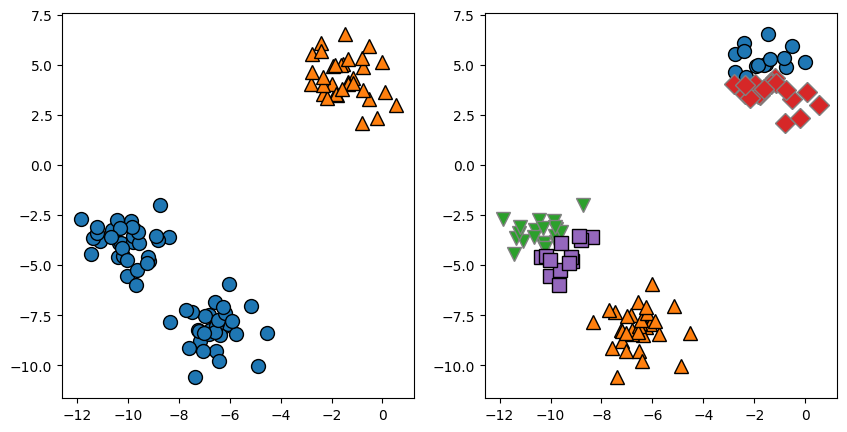

In [ ]:
# k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])


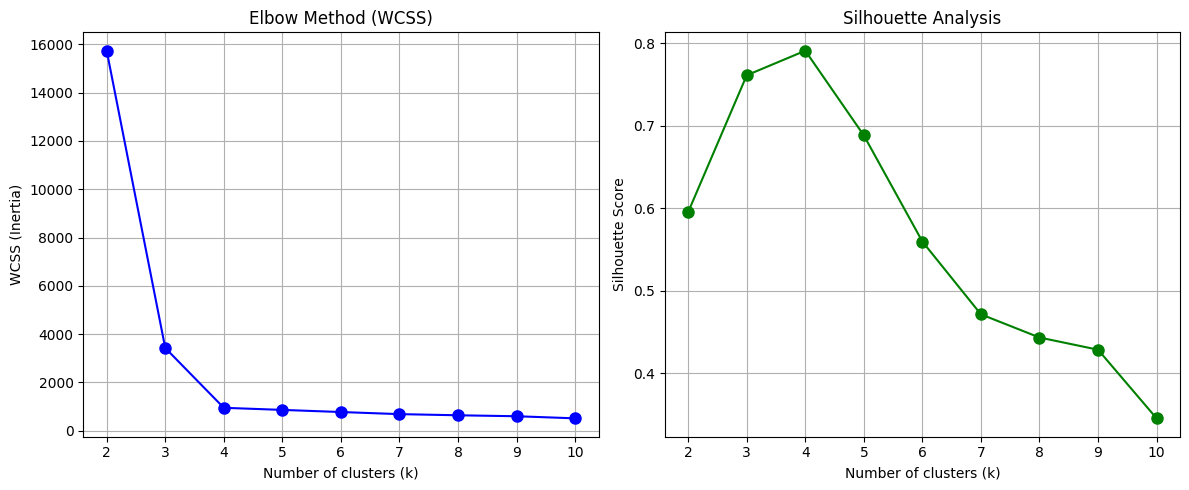

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate synthetic 2D data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Prepare lists to store metrics
inertias = []
silhouette_scores = []
K_range = range(2, 11)  # Silhouette score requires k >= 2

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot side by side
plt.figure(figsize=(12, 5))

# WCSS plot
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method (WCSS)')
plt.grid(True)

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

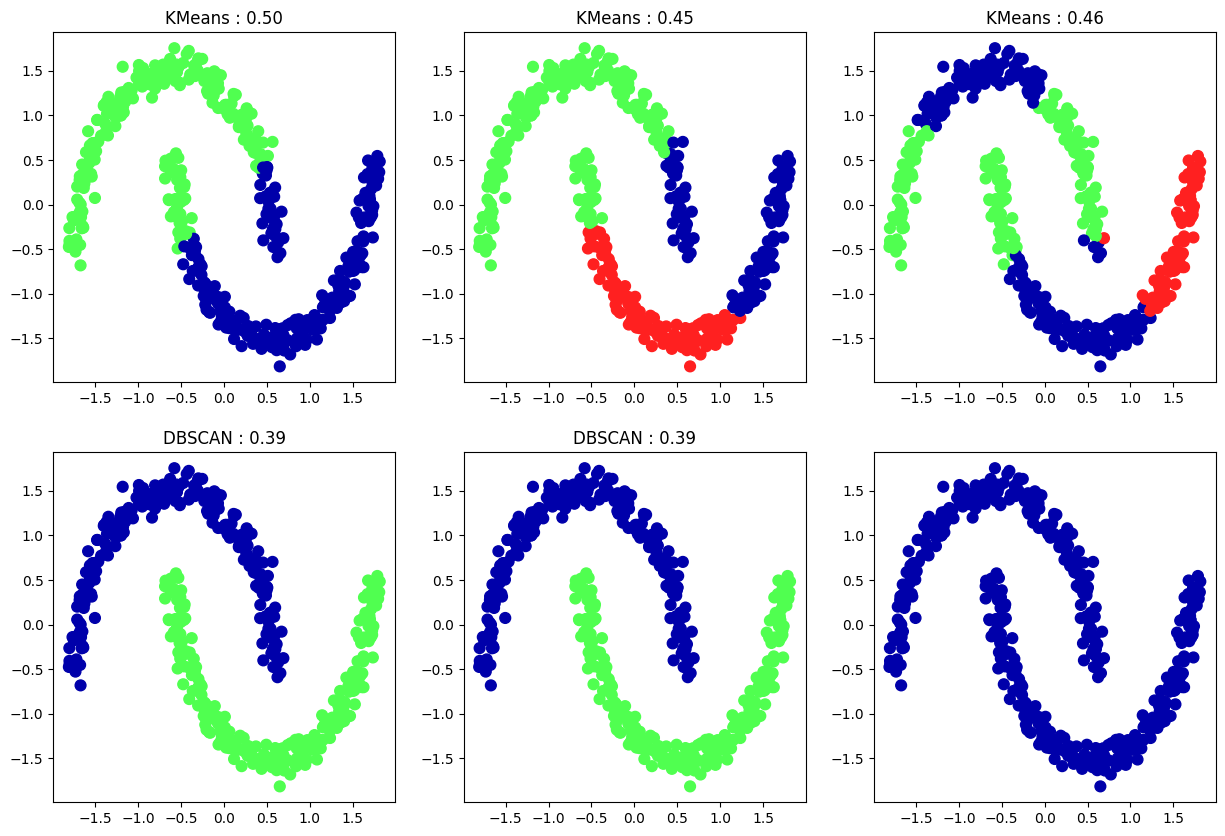

In [29]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.metrics import silhouette_score # Import silhouette_score

X, y = make_moons(n_samples=500, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

algorithms = [KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=5), DBSCAN(eps=0.2), DBSCAN(eps=0.5), DBSCAN(eps=0.8)]
for ax, algorithm in zip(axes[0:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  # plot the cluster assignments and cluster centers
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  score = -1 # Default silhouette score if only one cluster
  if len(np.unique(clusters)) > 1:
    score = silhouette_score(X_scaled, clusters)
  ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, score))

plt.tight_layout()
plt.show()

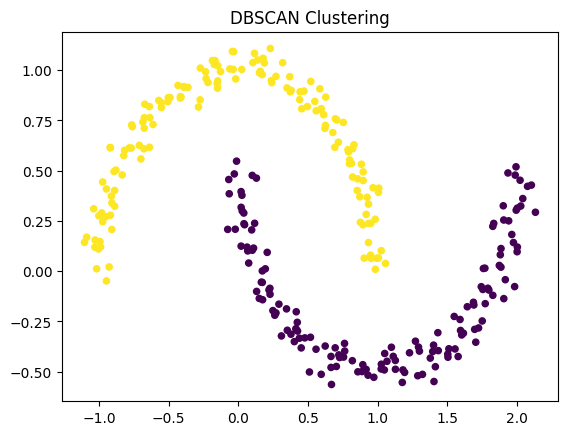

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=20)
plt.title("DBSCAN Clustering")
plt.show()